                                        PROJECT WORK

    TITLE

LOAN DEFAULT RISK PREDICTION 

        THE CHALLENGE: NAVIGATING LOAN RISK

Financial institutions face significant challenges in accurately assessing loan default risk. Traditional methods often fall short in today's 
complex financial landscape.

    PROBLEM STATEMENT
Develop a robust machine learning pipeline that accurately predicts loan default risk, enabling better credit decisions and minimizing financial losses.

    OBJECTIVE
Utilize customer behavioral and financial data to build a predictive model, enhancing accuracy and efficiency in risk assessment.

    UNDERSTANDING OUR DATA
Our analysis relies on a comprehensive datset, simulating real-world loan application scenarios to 
capture critical indicators of default risk

    CATEGORY             FEATURES
PERFORMANCE:            Customerid, Systemloanid, Loannumber, Approveddate, Creationdate, Loanamount, Totaldue, Termdays,
                        Referredby, Good_bad_flag
DEMOGRAPHIC:            Customerid, Birthdate, Bank_account_type, Longitude_gps, Latitude_gps, Bank_name_clients, Bank_branch_clients, 
                        Employment_status_clients, Level_of_education_clients
PREVIOUSLOAN:           Customerid, Systemloanid, Loannumber, Approveddate, Creationdate, Loanamount, Totaldue, Termdays, Closeddate,
                        Referredby, Firstduedate, Firstrepaiddate
TARGET:                 Loan Default(0: Bad, 1: Good) 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report    


DATA COLLECTION

In [10]:
# loading the dataset from url
url1 = "https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv"
url2 = "https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv"
url3 = "https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv" 

DATA IMPORTATION

In [12]:
df_perf = pd.read_csv(url1)
df_demo = pd.read_csv(url2)
df_prevloan= pd.read_csv(url3) 

# EXPLORATORY DATA ANALYSIS ON PERFORMANCE DATASET 

In [14]:
df_perf = pd.read_csv(url1)
df_perf.head()  

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [15]:
df_perf.shape 

(4368, 10)

In [16]:
# check for the info of the dataset
df_perf.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


OBSERVATION
    The Referredby has 587 rows which means there are some missing values.
    Other Entries has 4368 rows, so we work on the missing values

In [18]:
df_perf.columns 

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

In [19]:
df_perf.duplicated().sum() 

0

In [20]:
df_perf['customerid'].duplicated().sum() 

0

In [21]:
df_perf['good_bad_flag'].value_counts() 

good_bad_flag
Good    3416
Bad      952
Name: count, dtype: int64

In [22]:
(df_perf.isna().sum().sort_values(ascending=False)/len(df_perf))*100 

referredby       86.561355
customerid        0.000000
systemloanid      0.000000
loannumber        0.000000
approveddate      0.000000
creationdate      0.000000
loanamount        0.000000
totaldue          0.000000
termdays          0.000000
good_bad_flag     0.000000
dtype: float64

OBSERVATION
    There were no duplicates.     
    Referredby has missing values and it is over 80% so i am going to drop it.
    Dropping it because it is not going to have any good impact on my prediction.

In [24]:
df_perf.drop('referredby', axis=1, inplace=True) 

In [25]:
(df_perf.isna().sum().sort_values(ascending=False)/len(df_perf))*100 

customerid       0.0
systemloanid     0.0
loannumber       0.0
approveddate     0.0
creationdate     0.0
loanamount       0.0
totaldue         0.0
termdays         0.0
good_bad_flag    0.0
dtype: float64

In [26]:
df_perf.dtypes 

customerid        object
systemloanid       int64
loannumber         int64
approveddate      object
creationdate      object
loanamount       float64
totaldue         float64
termdays           int64
good_bad_flag     object
dtype: object

In [27]:
# Convert date columns to datetime
df_perf['approveddate'] = pd.to_datetime(df_perf['approveddate'])
df_perf['creationdate'] = pd.to_datetime(df_perf['creationdate']) 

In [28]:
df_perf.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customerid     4368 non-null   object        
 1   systemloanid   4368 non-null   int64         
 2   loannumber     4368 non-null   int64         
 3   approveddate   4368 non-null   datetime64[ns]
 4   creationdate   4368 non-null   datetime64[ns]
 5   loanamount     4368 non-null   float64       
 6   totaldue       4368 non-null   float64       
 7   termdays       4368 non-null   int64         
 8   good_bad_flag  4368 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 307.3+ KB


# EXPLORATORY DATA ANALYSIS ON DEMOGRAPHIC DATASET 

In [30]:
df_demo = pd.read_csv(url2)
df_demo.head() 

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [31]:
df_demo.shape 

(4346, 9)

In [32]:
df_demo.duplicated().sum() 

12

In [33]:
df_demo.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [34]:
df_demo['birthdate'] = pd.to_datetime(df_demo['birthdate'], errors='coerce') 

In [35]:
(df_demo.isna().sum().sort_values(ascending=False)/len(df_demo))*100 

bank_branch_clients           98.826507
level_of_education_clients    86.493327
employment_status_clients     14.910262
customerid                     0.000000
birthdate                      0.000000
bank_account_type              0.000000
longitude_gps                  0.000000
latitude_gps                   0.000000
bank_name_clients              0.000000
dtype: float64

OBSERVATION
    There are 12 duplicates
    Bank_branch_clients, Employment_status_clients, and Level_of_education_clients has missing values
    Since the missing values are over 80%, will be dropping it.

In [37]:
df_demo.employment_status_clients.unique() 

array([nan, 'Permanent', 'Student', 'Self-Employed', 'Unemployed',
       'Retired', 'Contract'], dtype=object)

CLEANING AND VALIDATING THE DATA IN THE DATASET

In [39]:
# For columns with high missingness (>80%), we consider dropping
df_demo.drop(['bank_branch_clients', 'level_of_education_clients'], axis=1, inplace=True) 

In [40]:
# For categorical columns like employment_status_clients
df_demo['employment_status_clients'].fillna('Unknown', inplace=True)  

In [41]:
df_demo.bank_account_type.unique() 

array(['Savings', 'Other', 'Current'], dtype=object)

In [42]:
df_demo.bank_name_clients.unique() 

array(['GT Bank', 'Sterling Bank', 'Fidelity Bank', 'Access Bank',
       'EcoBank', 'FCMB', 'Skye Bank', 'UBA', 'Zenith Bank',
       'Diamond Bank', 'First Bank', 'Union Bank', 'Stanbic IBTC',
       'Standard Chartered', 'Heritage Bank', 'Keystone Bank',
       'Unity Bank', 'Wema Bank'], dtype=object)

In [43]:
print("Latitude range:", df_demo['latitude_gps'].min(), "to", df_demo['latitude_gps'].max())
print("Longitude range:", df_demo['longitude_gps'].min(), "to", df_demo['longitude_gps'].max()) 

Latitude range: -33.8688183 to 71.2280693936817
Longitude range: -118.2470093 to 151.20929


In [44]:
df_demo = df_demo.drop_duplicates()  

In [45]:
df_demo.shape 

(4334, 7)

In [46]:
df_demo.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 4334 entries, 0 to 4345
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customerid                 4334 non-null   object        
 1   birthdate                  4334 non-null   datetime64[ns]
 2   bank_account_type          4334 non-null   object        
 3   longitude_gps              4334 non-null   float64       
 4   latitude_gps               4334 non-null   float64       
 5   bank_name_clients          4334 non-null   object        
 6   employment_status_clients  4334 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 270.9+ KB


# EXPLORATORY DATA ANALYSIS ON PREVLOANS DATASET 

In [48]:
df_prevloan = pd.read_csv(url3)
df_prevloan.head()  

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [49]:
df_prevloan.shape 

(18183, 12)

In [50]:
df_prevloan.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


# Converting the incorrect data types in the date column to a date-time datatype 

In [52]:
# Convert all date columns 
date_cols = ['approveddate', 'creationdate', 'closeddate', 'firstduedate', 'firstrepaiddate']
for col in date_cols:
    df_prevloan[col] = pd.to_datetime(df_prevloan[col], errors='coerce')    

In [53]:
df_prevloan.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customerid       18183 non-null  object        
 1   systemloanid     18183 non-null  int64         
 2   loannumber       18183 non-null  int64         
 3   approveddate     18183 non-null  datetime64[ns]
 4   creationdate     18183 non-null  datetime64[ns]
 5   loanamount       18183 non-null  float64       
 6   totaldue         18183 non-null  float64       
 7   termdays         18183 non-null  int64         
 8   closeddate       18183 non-null  datetime64[ns]
 9   referredby       1026 non-null   object        
 10  firstduedate     18183 non-null  datetime64[ns]
 11  firstrepaiddate  18183 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [54]:
# checking for unique customers
df_prevloan['customerid'].unique()  

array(['8a2a81a74ce8c05d014cfb32a0da1049',
       '8a8588f35438fe12015444567666018e',
       '8a85890754145ace015429211b513e16', ...,
       '8a858f6459b6456d0159b69978f22bed',
       '8a858fad5ccb633e015ccbe337372ab3',
       '8a858f0656b7820c0156c92ca3ba436f'], dtype=object)

In [55]:
# checking for number of unique customers
df_prevloan['customerid'].nunique() 

4359

In [56]:
df_prevloan.duplicated().sum() 

0

In [57]:
df_prevloan['customerid'].duplicated().sum() 

13824

In [58]:
df_prevloan.columns 

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

OBSERVATION
    There are no duplicates
    Referredby has missing values and it is over 80%, so i dropped it

# Creating new features(feature engineering) with the first due date and first repaid date 

In [61]:
df_prevloan['repayment_delay'] = (df_prevloan['firstrepaiddate'] - df_prevloan['firstduedate']).dt.days 

In [62]:
df_prevloan['repayment_delay']#first feature created 

0       -13
1        -4
2        22
3         0
4        11
         ..
18178    -3
18179    -6
18180    -3
18181    19
18182   -15
Name: repayment_delay, Length: 18183, dtype: int64

# FEATURE CREATIONS 

In [64]:
df_prevloan['interest_amount'] = df_prevloan['totaldue'] - df_prevloan['loanamount'] 

In [65]:
df_prevloan['interest_rate'] = ((
    (df_prevloan['totaldue'] - df_prevloan['loanamount']) / df_prevloan['loanamount']) * (365 / df_prevloan['termdays'])).round(2)
df_prevloan['repayment_ratio'] = df_prevloan['totaldue'] / df_prevloan['loanamount'] 

In [66]:
df_prevloan.head(3) 

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,repayment_delay,interest_amount,interest_rate,repayment_ratio
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43,-13,3000.0,3.65,1.30
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00,-4,3000.0,3.65,1.30
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47,22,3800.0,2.31,1.19


 AGGREGATING THE NEW FEATURES

In [68]:
# aggregating the new features on the customerid using groupby
df_prevloan_agg = df_prevloan.groupby('customerid').agg({
    'systemloanid': 'count', # number of past loans
    'loanamount': 'sum',
    'interest_amount': 'sum', # total late first repayments
    'interest_rate': 'sum', # total late closures
    'repayment_ratio': 'sum',
    'repayment_delay': 'sum',
}).reset_index() 

In [69]:
df_prevloan_agg.head(4)   

,customerid,systemloanid,loanamount,interest_amount,interest_rate,repayment_ratio,repayment_delay
0,8a1088a0484472eb01484669e3ce4e0b,1,10000.0,1500.0,3.65,1.150,6
1,8a1a1e7e4f707f8b014f797718316cad,4,70000.0,19500.0,11.86,5.125,-1
2,8a1a32fc49b632520149c3b8fdf85139,7,90000.0,16500.0,23.73,8.200,-3
3,8a1eb5ba49a682300149c3c068b806c7,8,130000.0,32400.0,23.35,10.070,-25


In [70]:
df_prevloan_agg.shape 

(4359, 7)

In [71]:
df_prevloan_agg['customerid'].nunique() 

4359

In [72]:
df_prevloan_agg['prevloanamount'] = df_prevloan_agg['loanamount'] 

In [73]:
df_prevloan_agg.drop(['loanamount'], axis=1, inplace=True) 

In [74]:
df_prevloan_agg.isna().sum()  

customerid         0
systemloanid       0
interest_amount    0
interest_rate      0
repayment_ratio    0
repayment_delay    0
prevloanamount     0
dtype: int64

In [75]:
df_prevloan_agg['customerid'].duplicated().sum() 

0

# MERGING THE DATASET OF THE TARGET DATASET WHICH IS THE PERFORMANCE USING LEFT JOIN 

In [77]:
df_merged = pd.merge(df_perf, df_demo, on='customerid', how='left') 

In [78]:
df_merged.shape 

(4368, 15)

In [79]:
df_merged.isna().sum().sort_values(ascending=False)/len(df_merged)*100 

birthdate                    25.160256
bank_account_type            25.160256
longitude_gps                25.160256
latitude_gps                 25.160256
bank_name_clients            25.160256
employment_status_clients    25.160256
customerid                    0.000000
systemloanid                  0.000000
loannumber                    0.000000
approveddate                  0.000000
creationdate                  0.000000
loanamount                    0.000000
totaldue                      0.000000
termdays                      0.000000
good_bad_flag                 0.000000
dtype: float64

In [80]:
df_merged.dropna(inplace=True) 

In [81]:
df_merged.isna().sum() 

customerid                   0
systemloanid                 0
loannumber                   0
approveddate                 0
creationdate                 0
loanamount                   0
totaldue                     0
termdays                     0
good_bad_flag                0
birthdate                    0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
dtype: int64

In [82]:
df = pd.merge(df_merged, df_prevloan_agg, on='customerid', how='left') 

In [83]:
df.head() 

,customerid,systemloanid_x,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,...,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,systemloanid_y,interest_amount,interest_rate,repayment_ratio,repayment_delay,prevloanamount
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,3.432010,6.433055,Diamond Bank,Permanent,11.0,42900.0,30.66,13.52,-10.0,200000.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Good,1985-08-23,...,3.885298,7.320700,GT Bank,Permanent,NaN,NaN,NaN,NaN,NaN,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,1984-09-18,...,11.139350,10.292041,EcoBank,Permanent,6.0,10500.0,21.90,7.05,5.0,60000.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,1977-10-10,...,3.985770,7.491708,First Bank,Permanent,2.0,4500.0,7.30,2.45,15.0,20000.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,1986-09-07,...,7.457913,9.076574,GT Bank,Permanent,8.0,38400.0,21.52,10.07,-25.0,150000.0


In [84]:
df.to_csv("powerbi worksheet.csv", index=False) 

In [85]:
df_prevloan_agg.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       4359 non-null   object 
 1   systemloanid     4359 non-null   int64  
 2   interest_amount  4359 non-null   float64
 3   interest_rate    4359 non-null   float64
 4   repayment_ratio  4359 non-null   float64
 5   repayment_delay  4359 non-null   int64  
 6   prevloanamount   4359 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 238.5+ KB


In [86]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customerid                 3269 non-null   object        
 1   systemloanid_x             3269 non-null   int64         
 2   loannumber                 3269 non-null   int64         
 3   approveddate               3269 non-null   datetime64[ns]
 4   creationdate               3269 non-null   datetime64[ns]
 5   loanamount                 3269 non-null   float64       
 6   totaldue                   3269 non-null   float64       
 7   termdays                   3269 non-null   int64         
 8   good_bad_flag              3269 non-null   object        
 9   birthdate                  3269 non-null   datetime64[ns]
 10  bank_account_type          3269 non-null   object        
 11  longitude_gps              3269 non-null   float64       
 12  latitu

# To create customer age using df of customer birthdate and the creation date

In [88]:
df['customer_age'] = (df['creationdate'] - df['birthdate']).dt.days//365 

In [89]:
df.head() 

,customerid,systemloanid_x,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,birthdate,...,latitude_gps,bank_name_clients,employment_status_clients,systemloanid_y,interest_amount,interest_rate,repayment_ratio,repayment_delay,prevloanamount,customer_age
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,6.433055,Diamond Bank,Permanent,11.0,42900.0,30.66,13.52,-10.0,200000.0,45
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Good,1985-08-23,...,7.320700,GT Bank,Permanent,NaN,NaN,NaN,NaN,NaN,NaN,31
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,1984-09-18,...,10.292041,EcoBank,Permanent,6.0,10500.0,21.90,7.05,5.0,60000.0,32
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,1977-10-10,...,7.491708,First Bank,Permanent,2.0,4500.0,7.30,2.45,15.0,20000.0,39
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,1986-09-07,...,9.076574,GT Bank,Permanent,8.0,38400.0,21.52,10.07,-25.0,150000.0,30


In [90]:
df.isna().sum() 

customerid                   0
systemloanid_x               0
loannumber                   0
approveddate                 0
creationdate                 0
loanamount                   0
totaldue                     0
termdays                     0
good_bad_flag                0
birthdate                    0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
systemloanid_y               5
interest_amount              5
interest_rate                5
repayment_ratio              5
repayment_delay              5
prevloanamount               5
customer_age                 0
dtype: int64

In [91]:
df.dropna(inplace=True) 

In [92]:
df.columns 

Index(['customerid', 'systemloanid_x', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'systemloanid_y',
       'interest_amount', 'interest_rate', 'repayment_ratio',
       'repayment_delay', 'prevloanamount', 'customer_age'],
      dtype='object')

In [93]:
df.drop(['customerid', 'systemloanid_x', 'systemloanid_y', 'longitude_gps', 'latitude_gps', 'approveddate', 'creationdate', 'birthdate'], axis=1, inplace=True) 

In [94]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 3264 entries, 0 to 3268
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loannumber                 3264 non-null   int64  
 1   loanamount                 3264 non-null   float64
 2   totaldue                   3264 non-null   float64
 3   termdays                   3264 non-null   int64  
 4   good_bad_flag              3264 non-null   object 
 5   bank_account_type          3264 non-null   object 
 6   bank_name_clients          3264 non-null   object 
 7   employment_status_clients  3264 non-null   object 
 8   interest_amount            3264 non-null   float64
 9   interest_rate              3264 non-null   float64
 10  repayment_ratio            3264 non-null   float64
 11  repayment_delay            3264 non-null   float64
 12  prevloanamount             3264 non-null   float64
 13  customer_age               3264 non-null   int64  
dt

# To seperate our data into categorical and numerical features 

In [96]:
cat_col = df.select_dtypes(exclude= 'number').columns.to_list()
num_col = df.select_dtypes(include= 'number').columns.to_list() 

# descriptive statistics on the num_cols

In [98]:
df[num_col].describe().T.round() 

,count,mean,std,min,25%,50%,75%,max
loannumber,3264.0,5.0,4.0,2.0,2.0,4.0,7.0,27.0
loanamount,3264.0,17842.0,10746.0,10000.0,10000.0,10000.0,20000.0,60000.0
totaldue,3264.0,21291.0,11931.0,10000.0,13000.0,13000.0,24500.0,68100.0
termdays,3264.0,29.0,11.0,15.0,30.0,30.0,30.0,90.0
interest_amount,3264.0,12904.0,14034.0,750.0,3000.0,6000.0,18000.0,96300.0
interest_rate,3264.0,12.0,9.0,2.0,4.0,11.0,19.0,53.0
repayment_ratio,3264.0,5.0,4.0,1.0,1.0,4.0,8.0,29.0
repayment_delay,3264.0,-10.0,30.0,-386.0,-18.0,-6.0,0.0,363.0
prevloanamount,3264.0,69413.0,89964.0,5000.0,10000.0,30000.0,90000.0,770000.0
customer_age,3264.0,32.0,6.0,21.0,28.0,32.0,36.0,55.0


# Data Visualization 

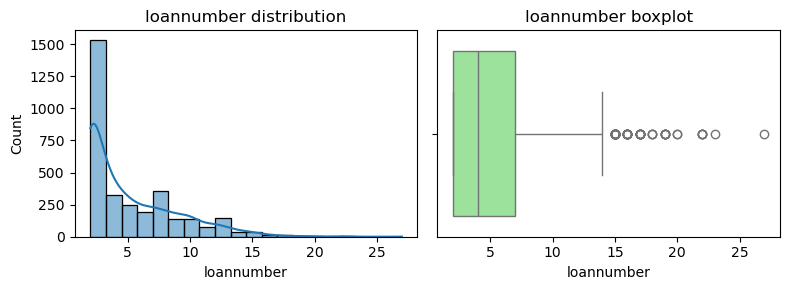

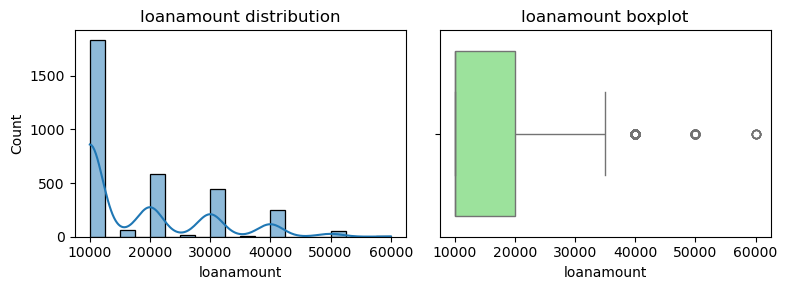

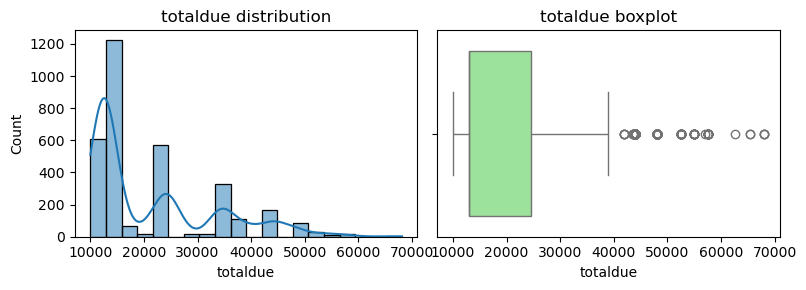

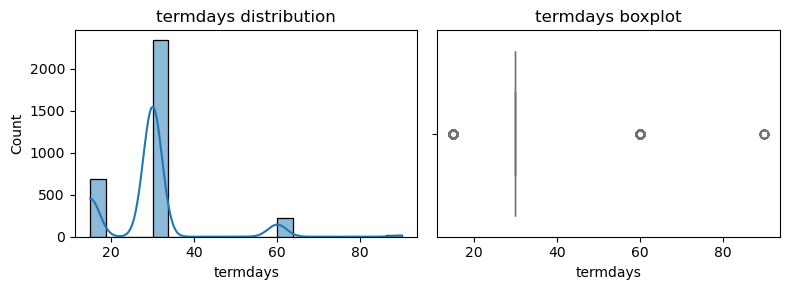

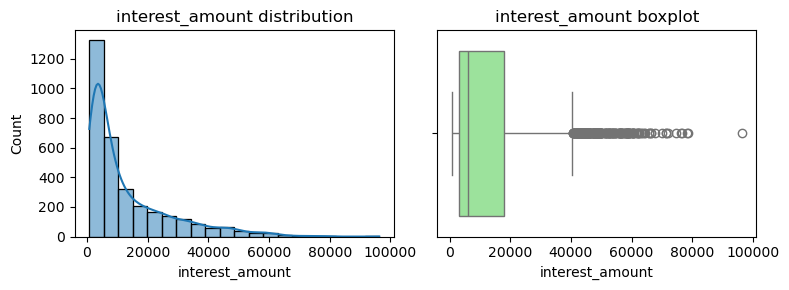

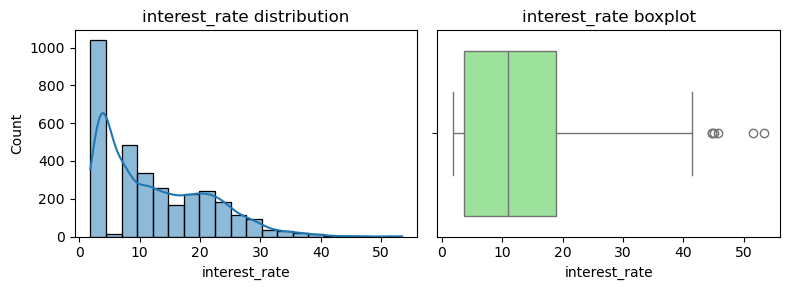

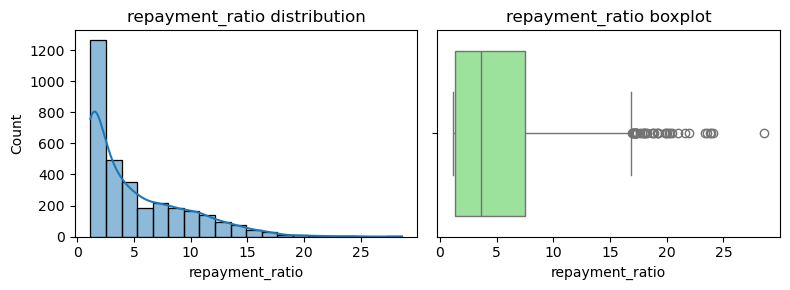

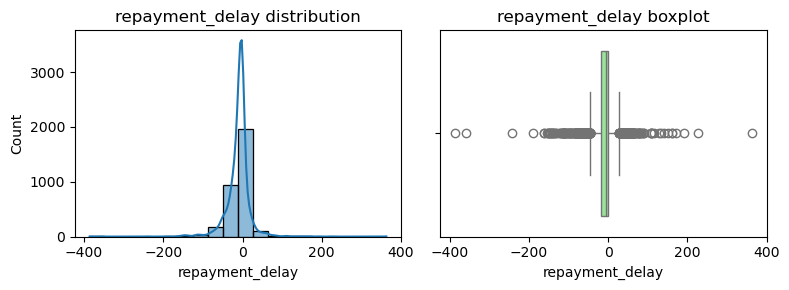

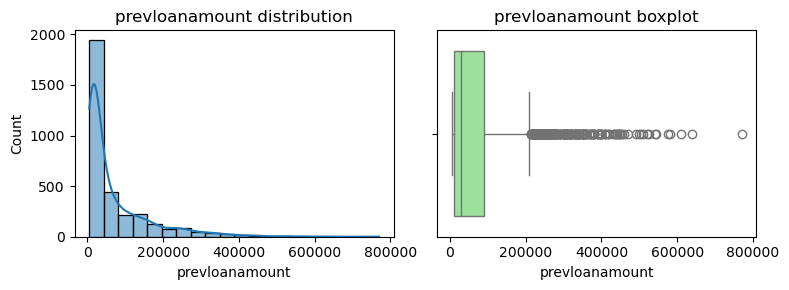

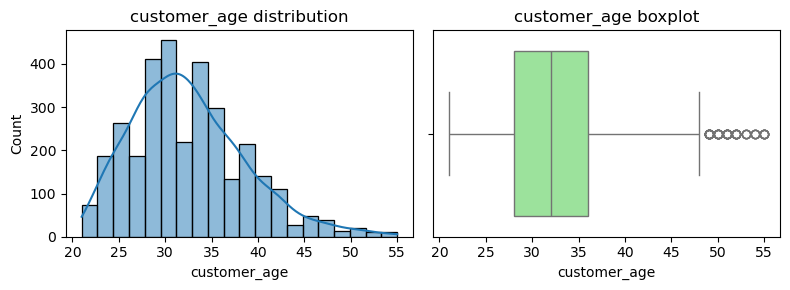

In [227]:
for col in num_col:
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} distribution') 
    plt.xlabel(f'{col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x= df[col], color='lightgreen')
    plt.title(f'{col} boxplot')
    plt.xlabel(f'{col}') 

    plt.tight_layout()
    plt.show()  

# Correlation Matrix 

In [102]:
corr_matrix = df[num_col].corr() 
corr_matrix 

,loannumber,loanamount,totaldue,termdays,interest_amount,interest_rate,repayment_ratio,repayment_delay,prevloanamount,customer_age
loannumber,1.000000,0.834948,0.816573,0.399014,0.941155,0.961102,0.998079,-0.417664,0.946384,-0.006417
loanamount,0.834948,1.000000,0.994321,0.550469,0.861611,0.749560,0.831958,-0.472023,0.854327,0.013702
totaldue,0.816573,0.994321,1.000000,0.620590,0.849941,0.739130,0.816080,-0.458633,0.828710,0.016523
termdays,0.399014,0.550469,0.620590,1.000000,0.518437,0.342979,0.414022,-0.242095,0.420859,-0.007343
interest_amount,0.941155,0.861611,0.849941,0.518437,1.000000,0.856242,0.948343,-0.414058,0.958143,0.001374
interest_rate,0.961102,0.749560,0.739130,0.342979,0.856242,1.000000,0.966649,-0.319490,0.828827,-0.009641
repayment_ratio,0.998079,0.831958,0.816080,0.414022,0.948343,0.966649,1.000000,-0.406603,0.938187,-0.006553
repayment_delay,-0.417664,-0.472023,-0.458633,-0.242095,-0.414058,-0.319490,-0.406603,1.000000,-0.469774,-0.001212
prevloanamount,0.946384,0.854327,0.828710,0.420859,0.958143,0.828827,0.938187,-0.469774,1.000000,0.002539
customer_age,-0.006417,0.013702,0.016523,-0.007343,0.001374,-0.009641,-0.006553,-0.001212,0.002539,1.000000


<Axes: >

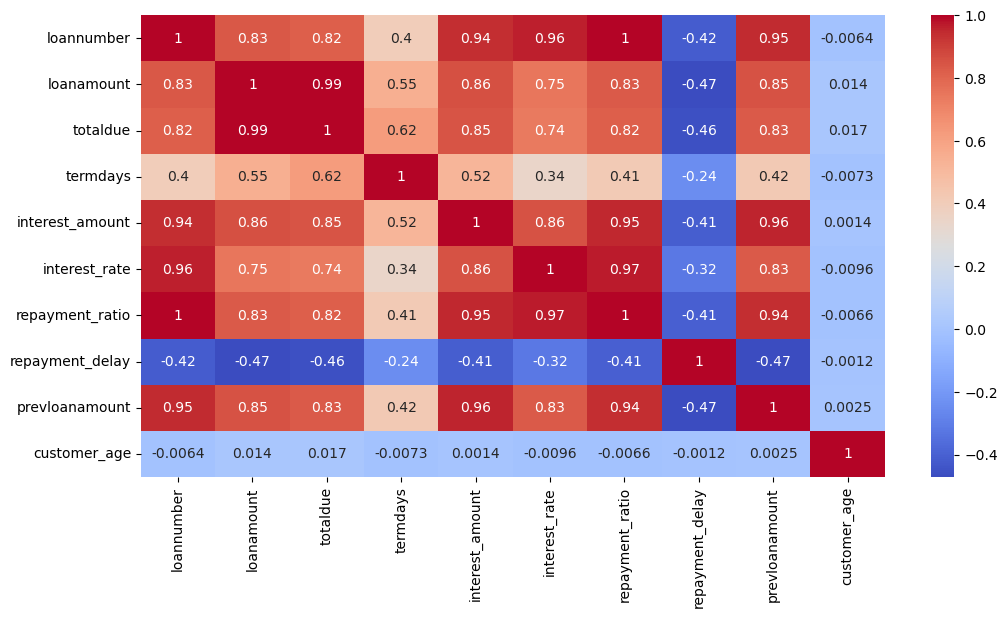

In [103]:
plt.figure(figsize = (12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 

In [104]:
len(cat_col) 

4

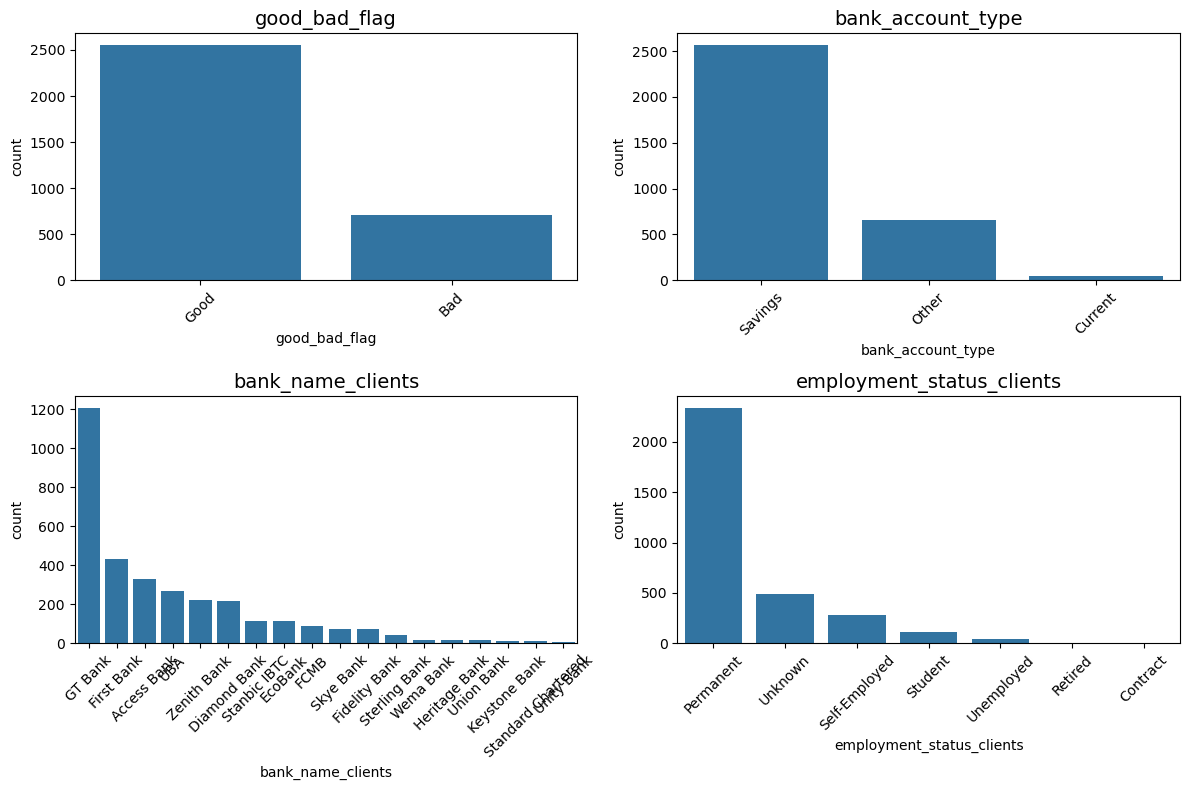

In [105]:
# visualizing for the categorical features
fig, ax=plt.subplots (2, 2, figsize= (12, 8)) 
axes =  ax.flatten() 
for i,  col in enumerate(cat_col):
    order = df[col].value_counts().index
    sns.countplot(x=df[col], ax=axes[i], order=order)
    axes[i].set_title(f'{col}', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show() 

# Splitting the data into features and targets 

In [107]:
x = df.drop(['good_bad_flag'], axis=1)
y = df['good_bad_flag'] 

# To resplit the num and cat features again 

In [109]:
cat_col = x.select_dtypes(exclude='number').columns.to_list()
num_col = x.select_dtypes(include='number').columns.to_list()  

In [110]:
x.columns 

Index(['loannumber', 'loanamount', 'totaldue', 'termdays', 'bank_account_type',
       'bank_name_clients', 'employment_status_clients', 'interest_amount',
       'interest_rate', 'repayment_ratio', 'repayment_delay', 'prevloanamount',
       'customer_age'],
      dtype='object')

In [111]:
le = LabelEncoder()
y = le.fit_transform(df['good_bad_flag'])  

Splitting the data set 

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y) 

# Pipelines 

In [115]:
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'))
])

preprocessors = ColumnTransformer(transformers= [
    ('num', num_pipeline, num_col),
    ('cat', cat_pipeline, cat_col), 
])  

In [116]:
preprocessors 

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['loannumber', 'loanamount', 'totaldue',
                                  'termdays', 'interest_amount',
                                  'interest_rate', 'repayment_ratio',
                                  'repayment_delay', 'prevloanamount',
                                  'customer_age']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['bank_account_type', 'bank_name_clients',
                                  'employment_status_clients'])])

Defining our models 

In [118]:
# Defining multiple classification models with fixed random states 
# for consistent training and comparison across algorithm

In [119]:
models = {
    'Logistic Regression': LogisticRegression(random_state=40, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=40),
    'Random Forest': RandomForestClassifier(random_state=40),
    'Gradient Boost': GradientBoostingClassifier(random_state=40),
}  

In [120]:
results = {} 
for name, model in models.items():
    pipeline = Pipeline (steps= [ 
    ('preprocessors', preprocessors),
        ('model', model) 
    ]) 
    pipeline.fit(x_train, y_train) 
    
    y_train_predict = pipeline.predict(x_train)
    y_test_predict = pipeline.predict(x_test) 

    # metrics
    train_accuracy = accuracy_score(y_train, y_train_predict)
    test_accuracy = accuracy_score(y_test, y_test_predict)
    train_score = f1_score(y_train, y_train_predict)
    test_score = f1_score(y_test, y_test_predict)
    test_precision = precision_score(y_test, y_test_predict)
    test_recall = recall_score(y_test, y_test_predict)
    
    results[name] = { 
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_score': train_score,
        'test_score': test_score,
        'test_precision': test_precision,
        'test_recall': test_recall
}      

In [121]:
results = pd.DataFrame(results)
results 

,Logistic Regression,Decision Tree,Random Forest,Gradient Boost
train_accuracy,0.786289,0.995021,0.995021,0.825354
test_accuracy,0.784074,0.699847,0.773354,0.799387
train_score,0.879168,0.996811,0.996819,0.897574
test_score,0.877922,0.805941,0.865209,0.882511
test_precision,0.787267,0.815631,0.809199,0.814570
test_recall,0.992172,0.796477,0.929550,0.962818
